In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.optimize import bracket, minimize_scalar

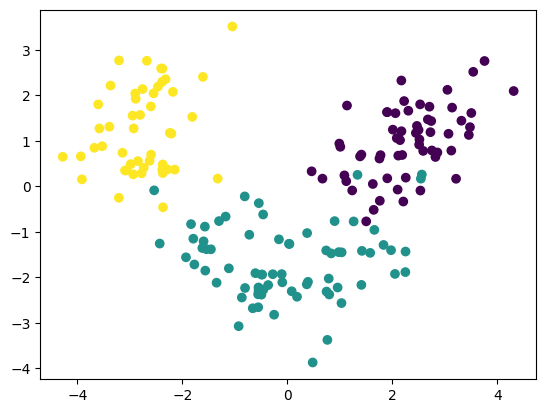

In [2]:
data = load_wine()

X_original = np.array(data['data'])
Y_original = np.array(data['target'], dtype=int)

indx = np.argsort(Y_original)
X_original = X_original[indx]
Y_original = Y_original[indx]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y_original)

In [ ]:
from sklearn.cluster import KMeans

def select_landmarks(X, n_landmarks, method='kmeans'):
    if method == 'kmeans':
        kmeans = KMeans(n_clusters=n_landmarks)
        kmeans.fit(X)
        return kmeans.cluster_centers_
    elif method == 'random':
        return X[np.random.choice(X.shape[0], size=n_landmarks, replace=False)]

def pairwise_squared_distance(X, L=None):
    if L is None:
        P = X.T @ X
        return P.diagonal().reshape(-1, 1) + P.diagonal().reshape(1, -1) - 2 * P
    else:
        return np.sum(X ** 2, axis=1).reshape(-1, 1) + np.sum(L ** 2, axis=1).reshape(1, -1) - 2 * X @ L.T

def assign_landmarks(X, L):
    D = pairwise_squared_distance(X, L)
    return np.argmin(D, axis=1)

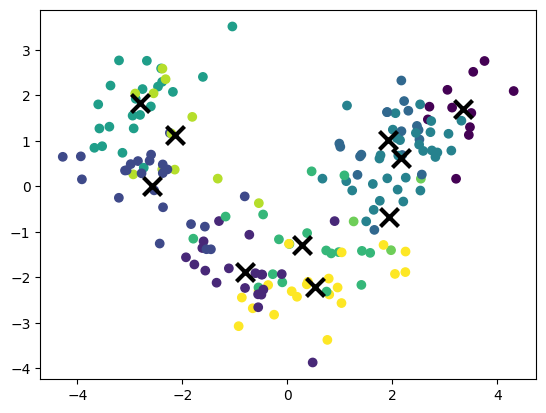

In [4]:
n_landmarks = 10
L = select_landmarks(X_scaled, n_landmarks, method='kmeans')
Y = assign_landmarks(X_scaled, L)
L_reduced = pca.transform(L)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.scatter(L_reduced[:, 0], L_reduced[:, 1], marker="x", s=169, linewidths=3, color="k", zorder=10)

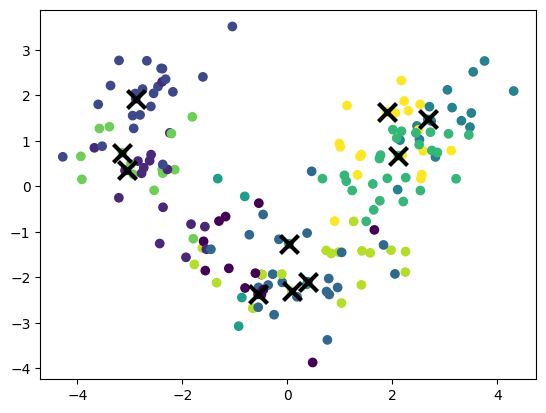

In [5]:
n_landmarks = 10
L = select_landmarks(X_scaled, n_landmarks, method='random')
Y = assign_landmarks(X_scaled, L)
L_reduced = pca.transform(L)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y)
plt.scatter(L_reduced[:, 0], L_reduced[:, 1], marker="x", s=169, linewidths=3, color="k", zorder=10)